In [61]:
import keras as keras
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, BatchNormalization, DepthwiseConv2D,\
    MaxPooling2D

from keras.initializers import glorot_uniform
from keras.initializers import Constant
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.datasets import cifar10, mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Resizing, RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import math
from IPython.display import Image
import math 

# ResNet
> 잔차 네트워크(residual network)를 사용한 구조 <br>
Kaiming He 등이 ILSVRC 2015 대회에서 승리 (3.6% 에러) <br>
152개 층 (34, 50, 101개 변종도 있다.) <br>
Skip connection (shortcut connection), identity function


### Load data

In [47]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# normalizing
x_train = x_train/255
x_test = x_test/255

# one-hot encoding
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

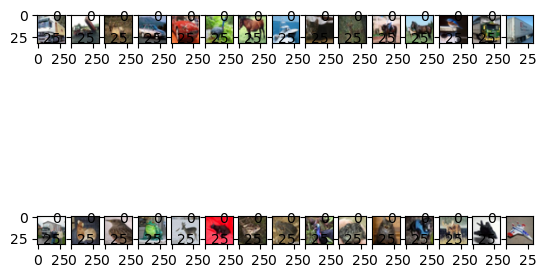

In [48]:
# Visualizing the data 
for i in range(1, 31):
    plt.subplot(2, 15, i)
    plt.imshow(x_train[i])



In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

def augmentattion(x_train, y_train, resizing) :
    
    model = Sequential([Rescaling(1/255.),
                        resizing,
                       RandomCrop(32,32), # 32 X 32로 조정되어 중심축이 변경되며 일부가 잘려진다.
                       RandomFlip('horizontal'),
                       RandomRotation(np.random.randint(0,360))])

    Model.build(model, (1, ti.shape[0], ti.shape[1], 3)) # 3차원
    
    globals()[f"x_train_2"] = model(x_train)
                
    # 데이터 결합
    globals()[f"x_train_all"] = np.concatenate((x_train, x_train_2), axis=0) 
    globals()[f"y_train_all"] = np.concatenate((y_train, y_train), axis=0)
    
    
    
resizing = Resizing(int(ti.shape[0]*1.1), int(ti.shape[1]*1.1)) 
augmentattion(x_train, y_train, resizing)

(32, 32, 3)
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


2022-12-08 17:00:57.805437: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: loop_body/cond/branch_executed/_9


## building base model

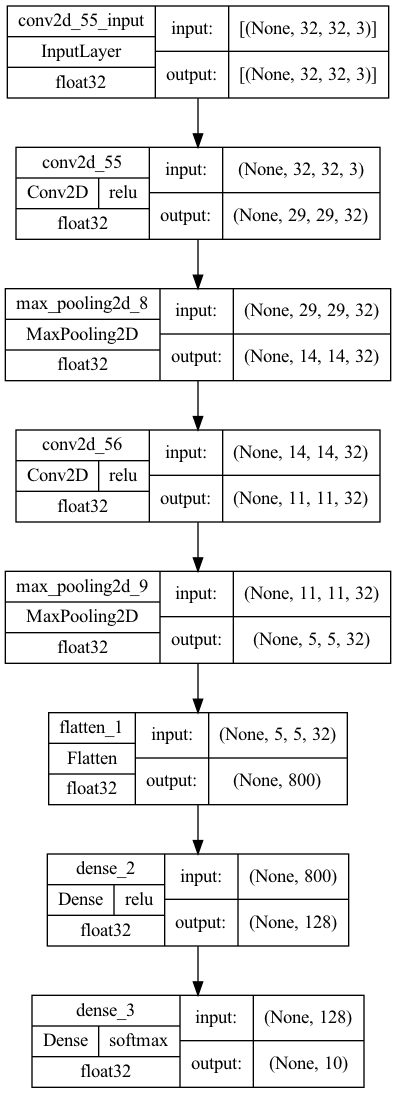

In [64]:
# Base Model
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)


In [67]:
model.summary()

history = model.fit(x_train, y_train_en, epochs = 30, verbose=1,validation_data=(x_test,y_test_en))



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_56 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [68]:
evaluation = model.evaluate(x_test, y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))


313/313 [==============================] - 2s 7ms/step - loss: 1.6301 - accuracy: 0.6525
Test Accuracy of Base Model: 0.6524999737739563


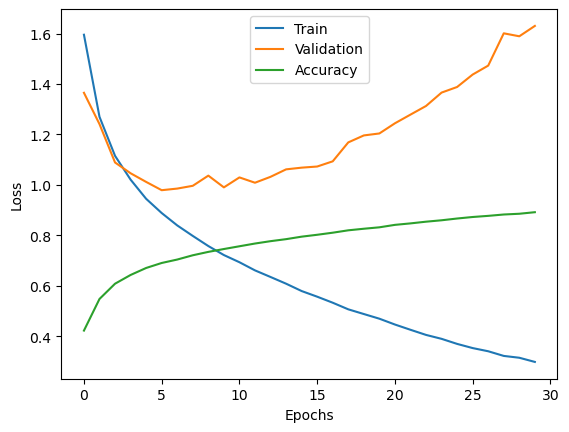

In [69]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history)

## model-1 with drop out

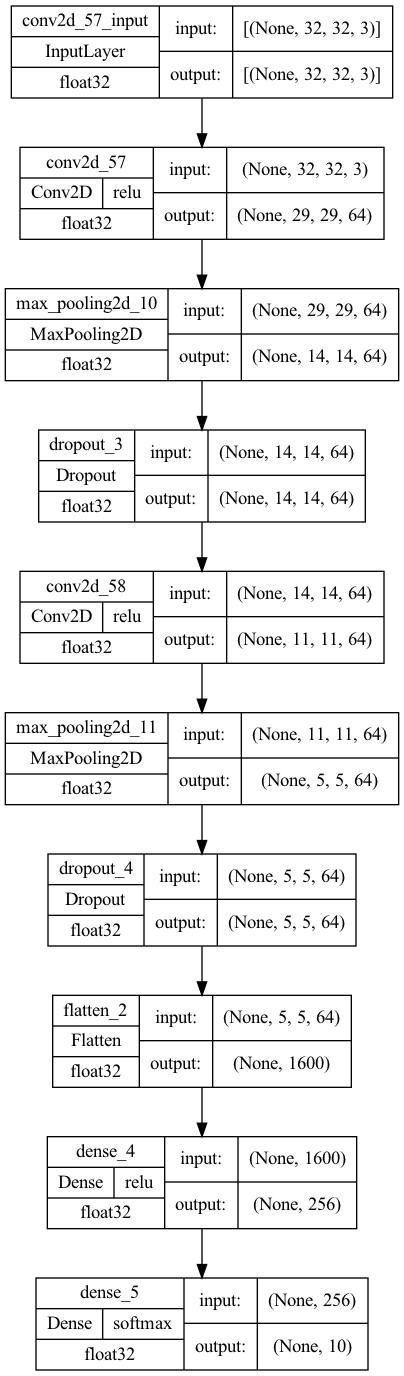

In [70]:
# Model_1 with Dropouts
model_1 = Sequential()
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5)) 
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(10,activation='softmax'))

model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

plot_model(model_1, show_shapes=True, show_dtype=True, show_layer_activations=True)



In [71]:
model_1.summary()

history_1 = model_1.fit(x_train, y_train_en, epochs = 50, verbose=1,validation_data=(x_test,y_test_en))



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 29, 29, 64)        3136      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_58 (Conv2D)          (None, 11, 11, 64)        65600     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
evaluation = model_1.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_1(with Dropouts): {}'.format(evaluation[1]))



In [ ]:
def plotloss(history_1):
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.plot(history_1.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history_1)

## model-2 with more filters

In [ ]:
# Model_2 with more filters
model_2 = Sequential()
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4)) 
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(units =10  , activation = 'softmax'))

model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_2.summary()
history_2 = model_2.fit(X_train, Y_train_en, epochs = 100, verbose=1, validation_data=(X_test,Y_test_en))

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
evaluation = model_2.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_2(with more  filters): {}'.format(evaluation[1]))

In [ ]:
def plotloss(history_2):
    plt.plot(history_2.history['loss'])
    plt.plot(history_2.history['val_loss'])
    plt.plot(history_2.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history_2)

## Model-3 with Batch Normalization

In [ ]:
# Model_3 with Batch Normalization
model_3 = Sequential()
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_3.summary()
history_3 = model_3.fit(X_train, Y_train_en, epochs = 100, verbose = 1, validation_data = (X_test, Y_test_en))

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
evaluation = model_3.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

In [ ]:
def plotloss(history_3):
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.plot(history_3.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history_3)

### 여기까지

### model 설계

In [37]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [10]:
def deepConv2D(x, fts, kns, std, name, num) :
#     st = 1
#     if std == 2 : st == 2
#     else : st == 1
        
    y = Conv2D(filters=fts, kernel_size=kns, strides=std, padding='same', activation='relu', 
              kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    y = BatchNormalization()(y)
    
    for i in range(num-1) :
        y = Conv2D(filters=fts, kernel_size=kns, strides=1, padding='same', activation='relu', 
                  kernel_initializer=kernel_init, bias_initializer=bias_init)(y)
        y = BatchNormalization()(y)
    
    if std == 2 :
        x = Conv2D(filters=fts, kernel_size=1, strides=2, padding='same', activation='relu', 
                  kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
        x = BatchNormalization()(x)

      
    output = x + y
    return output    

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


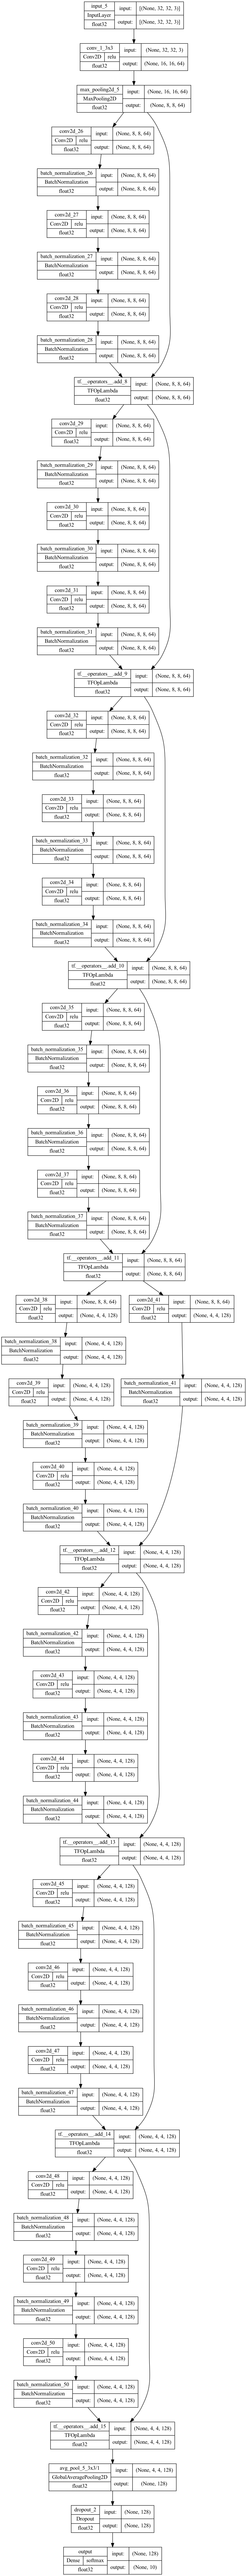

In [38]:
input_layer = Input(x_train_all.shape[1:])

x = Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu', name='conv_1_3x3', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((2, 2))(x)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/1", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/2", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/3", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/4", 3)

x = deepConv2D(x, 128, (3,3), 2, "Conv2D/128/3x3/1", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/2", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/3", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/4", 3)

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
# x = Flatten()(x)
x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)

model1 = Model(input_layer, x, name='ResNet_JSR')

plot_model(model1, show_shapes=True, show_dtype=True, show_layer_activations=True)

## Model fit & Evaluate & Predict

In [41]:
class MyCallback(Callback):
    def on_epoch_end(self, end, logs={}):
        if logs.get('val_acc') > 0.95:
            self.model.stop_training = True
            print('\n')
            print('목표 정확도 달성: 검증 정확도 %.4f' % logs.get('val_acc'))
my_callback = MyCallback()



def mdFit(model, num, X_train, y_train, my_callback) : # + best model select.

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #No OneHot Encoding : sparse_categorical_crossentropy
              metrics=['acc'])
    model.summary()
       
    best_model_path = f"./bestModel/LeNet5/best_cnn_model{num}.h5" 
    save_best_model = ModelCheckpoint(best_model_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False)

    globals()[f'hist{num}'] = model.fit(
        x=X_train, y=y_train, batch_size=128, epochs=20, verbose=1,
        validation_split=0.2, callbacks=[my_callback ,save_best_model]) 
    # validation : (x_test, y_test)값을 가지고 와서 봐도 된다. 현재 0.2의 비율로 가져와서
    
    globals()[f'best_model{num}'] = load_model(best_model_path)
    globals()[f'best_model{num}'].summary()
    
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(x_tst, y_tst, batch_size=30, verbose=1)
    
def mdPred(model, X_tst) :
    result = model.predict(X_tst)
    return result

model3.fit()

In [42]:
mdFit(model1, 1, x_train_all, y_train_all, my_callback)

Model: "ResNet_JSR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1_3x3 (Conv2D)            (None, 16, 16, 64)   1792        ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 8, 8, 64)    0           ['conv_1_3x3[0][0]']             
                                                                                                  
 conv2d_26 (Conv2D)             (None, 8, 8, 64)     36928       ['max_pooling2d_5[0][0]']        
                                                                                         

 batch_normalization_38 (BatchN  (None, 4, 4, 128)   512         ['conv2d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_39 (Conv2D)             (None, 4, 4, 128)    147584      ['batch_normalization_38[0][0]'] 
                                                                                                  
 batch_normalization_39 (BatchN  (None, 4, 4, 128)   512         ['conv2d_39[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_41 (Conv2D)             (None, 4, 4, 128)    8320        ['tf.__operators__.add_11[0][0]']
                                                                                                  
 conv2d_40

Total params: 2,161,546
Trainable params: 2,156,682
Non-trainable params: 4,864
__________________________________________________________________________________________________
Epoch 1/20
625/625 [==============================] - 190s 293ms/step - loss: 1.7893 - acc: 0.3550 - val_loss: 2.3546 - val_acc: 0.1510
Epoch 2/20
625/625 [==============================] - 189s 302ms/step - loss: 1.4240 - acc: 0.4842 - val_loss: 2.9416 - val_acc: 0.2059
Epoch 3/20
625/625 [==============================] - 188s 301ms/step - loss: 1.2706 - acc: 0.5436 - val_loss: 1.8165 - val_acc: 0.3389
Epoch 4/20
625/625 [==============================] - 190s 304ms/step - loss: 1.1671 - acc: 0.5821 - val_loss: 2.0742 - val_acc: 0.2734
Epoch 5/20
625/625 [==============================] - 196s 313ms/step - loss: 1.0854 - acc: 0.6124 - val_loss: 1.8553 - val_acc: 0.3131
Epoch 6/20
625/625 [==============================] - 194s 310ms/step - loss: 1.0096 - acc: 0.6406 - val_loss: 2.1754 - val_acc: 0.2703
Epoch

KeyboardInterrupt: 

In [ ]:
best_model0.evaluate(x_test, y_test, batch_size=30, verbose=1)

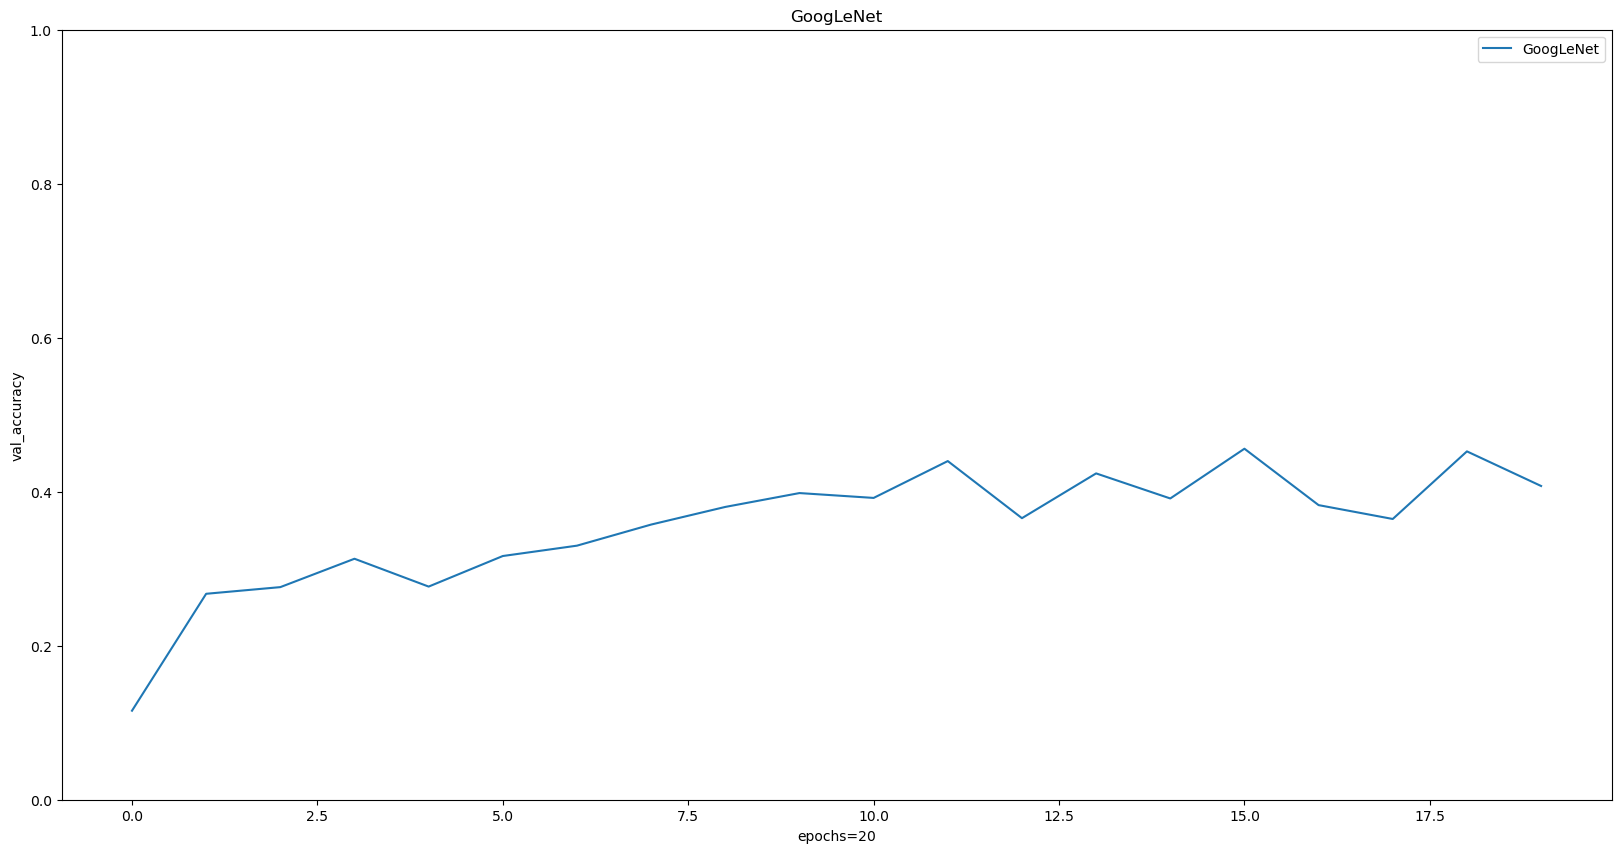

In [82]:
plt.figure(figsize=(20,10))
# plt.plot(hist1.history['val_loss'], label='val_loss1')
# plt.plot(hist2.history['val_loss'], label='val_loss2')
# plt.plot(hist3.history['val_loss'], label='val_loss3')
# plt.plot(hist4.history['val_loss'], label='val_loss4')
plt.plot(hist0.history['val_acc'], label='GoogLeNet')
# plt.plot(hist4.history['val_acc'], label='ESK')
# plt.plot(hist1.history['val_accuracy'], label='Flatten, 2hd')
# plt.plot(hist2.history['val_accuracy'], label='Flatten, 3hd')
# plt.plot(hist3.history['val_accuracy'], label='Flatten, 4hd')
# plt.plot(hist4.history['val_accuracy'], label='Conv2D')
# plt.plot(hist5.history['val_accuracy'], label='Conv2D_2')
plt.ylim(0, 1)
plt.title("GoogLeNet")
plt.ylabel("val_accuracy")
plt.xlabel("epochs=20")
plt.legend()


In [96]:
test = pd.read_csv('./fashionmnist/data/test.csv')
train = pd.read_csv('./fashionmnist/data/train.csv')
submi = pd.read_csv('./fashionmnist/data/sample_submission.csv')


In [97]:
print(test.shape, train.shape, submi.shape)

(10000, 785) (60000, 786) (10000, 2)


# cifar-10 micniproject

### DataSet

In [11]:
tr = os.listdir('./cifar-10/train/train/')
ts = os.listdir('./cifar-10/test/test/')

len(ts)

300000

In [12]:
def saveDir(x, option) : 
    globals()['li'] = []
    
    for idx, y in enumerate(x) :
        if option == "train" :
            src = cv2.imread(f'./cifar-10/train/train/{y}')
        elif option == "test" :
            src = cv2.imread(f'./cifar-10/test/test/{y}')
        else : 
            print("check option")
            break
        
#         blur = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0.0)
#         gap = src-blur
#         src = src + gap
        
        globals()[f'{option}{idx}'] = src

        li.append(globals()[f'{option}{idx}'])
    
    if option == "train" :
        globals()[f'{option}'] = np.array([li])
#         globals()[f'np{name}'] = globals()[f'np{name}'].reshape(len(globals()[f'np{name}'][0]),
#                                                                len(globals()[f'np{name}'][0][0]),
#                                                                len(globals()[f'np{name}'][0][0][0]))
    elif option == "test" :
        globals()[f'{option}'] = np.array([li])
#         globals()[f'npT{name}'] = globals()[f'npT{name}'].reshape(len(globals()[f'npT{name}'][0]),
#                                                                len(globals()[f'npT{name}'][0][0]),
#                                                                len(globals()[f'npT{name}'][0][0][0]))

In [13]:
saveDir(tr, "train")
saveDir(ts, "test")

In [14]:
x_train = train.reshape(50000, 32, 32, 3)

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
train.shape

(1, 50000, 32, 32, 3)

In [17]:
test = test.reshape(300000, 32, 32, 3)

In [183]:
test.shape

(1, 300000, 32, 32, 3)

### y_train set

In [25]:
trainLabels = pd.read_csv('./cifar-10/trainLabels.csv')

In [26]:
trainLabels

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
result = le.fit_transform(trainLabels['label'])
result.shape

(50000,)

In [28]:
y_train = to_categorical(result)

In [29]:
y_train.shape

(50000, 10)

### augmentation

In [177]:
def augmentattion(x_train, y_train, resizing) :
    
    model = Sequential([Rescaling(1/255.),
                        resizing,
                       RandomCrop(32,32), # 32 X 32로 조정되어 중심축이 변경되며 일부가 잘려진다.
                       RandomFlip('horizontal'),
                       RandomRotation(np.random.randint(0,360))])

    Model.build(model, (1, ti.shape[0], ti.shape[1], 3)) # 3차원
    
    globals()[f"x_train_2"] = model(x_train)
                
    # 데이터 결합
    globals()[f"x_train_all"] = np.concatenate((x_train, x_train_2), axis=0) 
    globals()[f"y_train_all"] = np.concatenate((y_train, y_train), axis=0)
    
    
    
resizing = Resizing(int(ti.shape[0]*1.1), int(ti.shape[1]*1.1)) 
augmentattion(x_train, y_train, resizing)

2022-12-07 16:47:41.351936: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: loop_body/cond/branch_executed/_9


### Network Setting

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


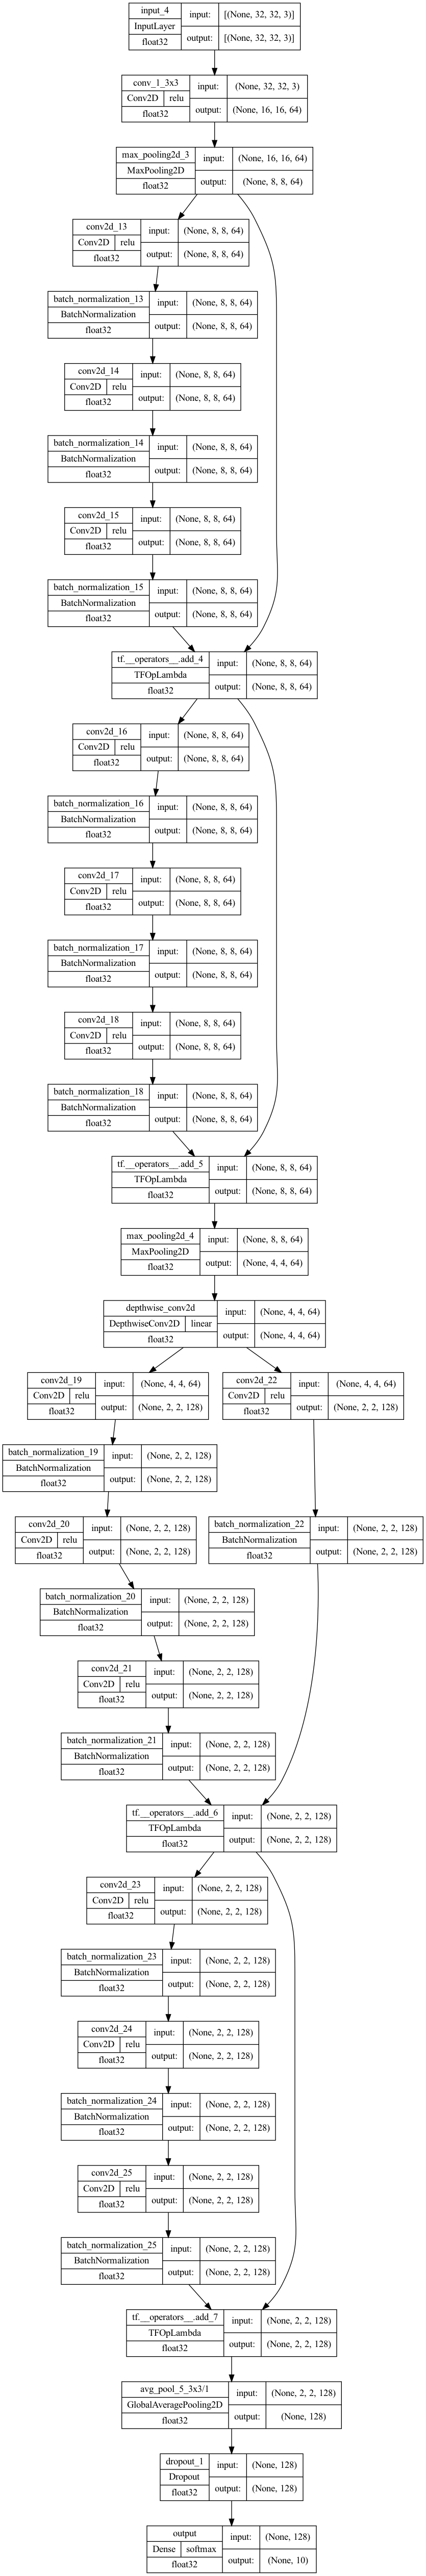

In [34]:
input_layer = Input(x_train_all.shape[1:])

x = Conv2D(64, (7, 7), strides=(2,2), padding='same', activation='relu', name='conv_1_3x3', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((2, 2))(x)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/1", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/2", 3)
# x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/3", 3)
# x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/4", 3)
x = MaxPool2D((2, 2))(x)
x = DepthwiseConv2D((2,2), strides=1, padding="same")(x)

x = deepConv2D(x, 128, (3,3), 2, "Conv2D/128/3x3/1", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/2", 3)
# x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/3", 3)
# x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/4", 3)

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
# x = Flatten()(x)
x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)

model3 = Model(input_layer, x, name='ResNet_JSR')

plot_model(model3, show_shapes=True, show_dtype=True, show_layer_activations=True)

### Model fit

In [24]:
mdFit(model3, 3, x_train, y_train, my_callback)

Model: "ResNet_JSR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1_3x3 (Conv2D)            (None, 16, 16, 64)   9472        ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 64)    0           ['conv_1_3x3[0][0]']             
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 64)     36928       ['max_pooling2d_1[0][0]']        
                                                                                         

 ormalization)                                                                                    
                                                                                                  
 tf.__operators__.add_3 (TFOpLa  (None, 2, 2, 128)   0           ['tf.__operators__.add_2[0][0]', 
 mbda)                                                            'batch_normalization_12[0][0]'] 
                                                                                                  
 avg_pool_5_3x3/1 (GlobalAverag  (None, 128)         0           ['tf.__operators__.add_3[0][0]'] 
 ePooling2D)                                                                                      
                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['avg_pool_5_3x3/1[0][0]']       
                                                                                                  
 output (D

KeyboardInterrupt: 

In [30]:
mdFit(model3, 3, x_train, y_train, my_callback)

Model: "ResNet_JSR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1_3x3 (Conv2D)            (None, 16, 16, 64)   9472        ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 64)    0           ['conv_1_3x3[0][0]']             
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 64)     36928       ['max_pooling2d_1[0][0]']        
                                                                                         

 ormalization)                                                                                    
                                                                                                  
 tf.__operators__.add_3 (TFOpLa  (None, 2, 2, 128)   0           ['tf.__operators__.add_2[0][0]', 
 mbda)                                                            'batch_normalization_12[0][0]'] 
                                                                                                  
 avg_pool_5_3x3/1 (GlobalAverag  (None, 128)         0           ['tf.__operators__.add_3[0][0]'] 
 ePooling2D)                                                                                      
                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['avg_pool_5_3x3/1[0][0]']       
                                                                                                  
 output (D

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "ResNet_JSR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1_3x3 (Conv2D)            (None, 16, 16, 64)   9472        ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 64)    0           ['conv_1_3x3[0][0]']             
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 64)     36928       ['max_pooling2d_1[0][0]']        
                                                                                         

 ormalization)                                                                                    
                                                                                                  
 tf.__operators__.add_3 (TFOpLa  (None, 2, 2, 128)   0           ['tf.__operators__.add_2[0][0]', 
 mbda)                                                            'batch_normalization_12[0][0]'] 
                                                                                                  
 avg_pool_5_3x3/1 (GlobalAverag  (None, 128)         0           ['tf.__operators__.add_3[0][0]'] 
 ePooling2D)                                                                                      
                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['avg_pool_5_3x3/1[0][0]']       
                                                                                                  
 output (D

In [185]:
result = best_model2.predict(test)

9375/9375 [==============================] - 208s 22ms/step


In [195]:
np.set_printoptions(threshold=300)
print(result, )
# np.set_printoptions(threshold=np.inf)

[[0.09656996 0.10065443 0.10704459 ... 0.10327828 0.1061478  0.10029434]
 [0.092815   0.10017113 0.11084211 ... 0.10510591 0.10590904 0.09612005]
 [0.09159376 0.0947929  0.11292394 ... 0.10678423 0.10482638 0.09024297]
 ...
 [0.09257189 0.09862454 0.1089929  ... 0.10425986 0.10511063 0.09582075]
 [0.08885594 0.10080108 0.11355381 ... 0.10812567 0.10424359 0.09161156]
 [0.09776986 0.10545836 0.10801612 ... 0.10258213 0.10853426 0.10328164]]


In [189]:
pd_sample = pd.read_csv('./cifar-10/sampleSubmission.csv')
pd_sample

,id,label
0,1,cat
1,2,cat
2,3,cat
3,4,cat
4,5,cat
...,...,...
299995,299996,cat
299996,299997,cat
299997,299998,cat
299998,299999,cat


In [35]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
model3.fit()